In [3]:
import xml.etree.ElementTree as ET
tree = ET.parse('Albiene.xml')
root = tree.getroot()
print(root.tag)

network


In [2]:
for child in root:
    print(child.tag)

meta
networkStructure
demands


In [58]:
network_structure = root.find('./networkStructure')

In [59]:
nodes = root.find("networkStructure/nodes")
nodes=[]
links=[]

In [60]:
nodes = root.find('networkStructure/nodes')

for node in nodes.findall('node'):
    node_id = node.get('id')
    coordinates = node.find('coordinates')

    if coordinates is not None:
        x = coordinates.find('x').text
        y = coordinates.find('y').text
        print(f"Node ID: {node_id}, Coordinates: ({x}, {y})")


Node ID: ATLAM5, Coordinates: (-84.3833, 33.75)
Node ID: ATLAng, Coordinates: (-85.5, 34.5)
Node ID: CHINng, Coordinates: (-87.6167, 41.8333)
Node ID: DNVRng, Coordinates: (-105.0, 40.75)
Node ID: HSTNng, Coordinates: (-95.517364, 29.770031)
Node ID: IPLSng, Coordinates: (-86.159535, 39.780622)
Node ID: KSCYng, Coordinates: (-96.596704, 38.961694)
Node ID: LOSAng, Coordinates: (-118.25, 34.05)
Node ID: NYCMng, Coordinates: (-73.9667, 40.7833)
Node ID: SNVAng, Coordinates: (-122.02553, 37.38575)
Node ID: STTLng, Coordinates: (-122.3, 47.6)
Node ID: WASHng, Coordinates: (-77.026842, 38.897303)


In [61]:
capacities = []
costs = []
links = root.find('networkStructure/links')
if links is not None:
    for link in links.findall('link'):
        link_id = link.get('id')

        source_elem = link.find('source')
        source = source_elem.text if source_elem is not None else None
        
        target_elem = link.find('target')
        target = target_elem.text if target_elem is not None else None
        
        additional_module = link.find('additionalModules')
        if additional_module is not None:
            pre_installed_module = additional_module.find('addModule')
            if pre_installed_module is not None:
                capacity_elem = pre_installed_module.find('capacity')
                capacity = capacity_elem.text if capacity_elem is not None else None
                
                cost_elem = pre_installed_module.find('cost')
                cost = cost_elem.text if cost_elem is not None else None
                
                if capacity is not None and cost is not None:
                    capacities.append(float(capacity))
                    costs.append(float(cost))
                
                print(f"Link ID: {link_id}, Source: {source}, Target: {target}, Capacity: {capacity}, Cost: {cost}")

# Output the capacities and costs
print("Costs:", costs)

Link ID: ATLAM5_ATLAng, Source: ATLAng, Target: ATLAM5, Capacity: 40000.0, Cost: 133.0
Link ID: ATLAng_HSTNng, Source: HSTNng, Target: ATLAng, Capacity: 40000.0, Cost: 1081.0
Link ID: ATLAng_IPLSng, Source: IPLSng, Target: ATLAng, Capacity: 40000.0, Cost: 591.0
Link ID: ATLAng_WASHng, Source: WASHng, Target: ATLAng, Capacity: 40000.0, Cost: 901.0
Link ID: CHINng_IPLSng, Source: IPLSng, Target: CHINng, Capacity: 40000.0, Cost: 260.0
Link ID: CHINng_NYCMng, Source: NYCMng, Target: CHINng, Capacity: 40000.0, Cost: 1147.0
Link ID: DNVRng_KSCYng, Source: KSCYng, Target: DNVRng, Capacity: 40000.0, Cost: 745.0
Link ID: DNVRng_SNVAng, Source: SNVAng, Target: DNVRng, Capacity: 40000.0, Cost: 1516.0
Link ID: DNVRng_STTLng, Source: STTLng, Target: DNVRng, Capacity: 40000.0, Cost: 1573.0
Link ID: HSTNng_KSCYng, Source: KSCYng, Target: HSTNng, Capacity: 40000.0, Cost: 1028.0
Link ID: HSTNng_LOSAng, Source: LOSAng, Target: HSTNng, Capacity: 40000.0, Cost: 2196.0
Link ID: IPLSng_KSCYng, Source: KSCYn

In [62]:
demands = root.find('demands').findall('demand')

# Iterate over each demand and extract id and demandValue
for demand in demands:
    demand_id = demand.attrib['id']
    demand_value_elem = demand.find('demandValue')
    if demand_value_elem is not None:
        demand_value = demand_value_elem.text
        print(f"Demand ID: {demand_id}")
        print(f"Demand Value: {demand_value}\n")
    else:
        print(f"No demandValue found for demand ID: {demand_id}")


Demand ID: IPLSng_STTLng
Demand Value: 3580.0

Demand ID: CHINng_ATLAM5
Demand Value: 2770.0

Demand ID: HSTNng_STTLng
Demand Value: 1745.0

Demand ID: LOSAng_KSCYng
Demand Value: 2766.0

Demand ID: LOSAng_NYCMng
Demand Value: 11969.0

Demand ID: HSTNng_LOSAng
Demand Value: 16437.0

Demand ID: IPLSng_CHINng
Demand Value: 27187.0

Demand ID: LOSAng_STTLng
Demand Value: 9684.0

Demand ID: LOSAng_SNVAng
Demand Value: 22906.0

Demand ID: DNVRng_ATLAM5
Demand Value: 1642.0

Demand ID: HSTNng_ATLAM5
Demand Value: 832.0

Demand ID: ATLAM5_KSCYng
Demand Value: 630.0

Demand ID: CHINng_DNVRng
Demand Value: 31363.0

Demand ID: KSCYng_NYCMng
Demand Value: 3823.0

Demand ID: HSTNng_IPLSng
Demand Value: 3337.0

Demand ID: DNVRng_IPLSng
Demand Value: 7694.0

Demand ID: WASHng_NYCMng
Demand Value: 40069.0

Demand ID: KSCYng_WASHng
Demand Value: 4507.0

Demand ID: SNVAng_NYCMng
Demand Value: 5447.0

Demand ID: WASHng_DNVRng
Demand Value: 16062.0

Demand ID: KSCYng_STTLng
Demand Value: 1946.0

Demand I

In [63]:
gml_output = "graph [\n"
id_count = 0
eid_count = 0
nodes_list = []

nodes = root.find('networkStructure/nodes')
for node in nodes.findall('node'):
    node_id = node.get('id')
    nodes_list.append(node_id)
    
    coordinates = node.find('coordinates')
    if coordinates is not None:
        x = coordinates.find('x').text
        y = coordinates.find('y').text
    else:
        x = '0'  
        y = '0'  
    gml_output += '  node [\n'
    gml_output += f'    id {id_count}\n'
    gml_output += f'    label "{node_id}"\n'
    gml_output += f'    country "US"\n'
    gml_output += f'    Longitude {x}\n'
    gml_output += f'    Latitude {y}\n'
    gml_output += '  ]\n'
    
    id_count += 1

demand_values = {}
demands = root.find('demand')
if demands is not None:
    for demand in demands.findall('demand'):
        demand_id = demand.get('id')
        demand_value_elem = demand.find('demandValue')
        if demand_value_elem is not None:
            demand_values[demand_id] = demand_value_elem.text
links = root.find('networkStructure/links')
if links is not None:
    for link in links.findall('link'):
        link_id = link.get('id')
        
        source_elem = link.find('source')
        target_elem = link.find('target')
        
        if source_elem is not None and target_elem is not None:
            source_id = source_elem.text
            target_id = target_elem.text
            
            if source_id in nodes_list and target_id in nodes_list:
                source = nodes_list.index(source_id)
                target = nodes_list.index(target_id)
            else:
                continue  
            
            additional_module = link.find('additionalModules')
            if additional_module is not None:
                pre_installed_module = additional_module.find('addModule')
                if pre_installed_module is not None:
                    capacity_elem = pre_installed_module.find('capacity')
                    cost_elem = pre_installed_module.find('cost')
                    
                    if capacity_elem is not None:
                        capacity = capacity_elem.text
                    else:
                        capacity = '0' 
                    
                    if cost_elem is not None:
                        cost = cost_elem.text
                    else:
                        cost = '0'  
                    demand_value = demand_values.get(link_id, '0')
                    gml_output += '  edge [\n'
                    gml_output += f'    id {eid_count}\n'
                    gml_output += f'    link_label "{link_id}"\n'
                    gml_output += f'    source {source}\n'
                    gml_output += f'    target {target}\n'
                    gml_output += f'    capacity {capacity}\n'
                    gml_output += f'    cost {cost}\n'
                    gml_output += f'    demandValue {demand_value}\n'
                    gml_output += '  ]\n'
                    
                    eid_count += 1
else:
    print("No links found in the XML structure.")

gml_output += "]"

output_file = 'Albienes.gml'
with open(output_file, 'w') as f:
    f.write(gml_output)

print(f"GML file '{output_file}' has been created successfully.")

GML file 'Albienes.gml' has been created successfully.


In [64]:
import networkx as nx
G= nx.read_gml("Albienes.gml")
print(G.nodes(data=True))

[('ATLAM5', {'country': 'US', 'Longitude': -84.3833, 'Latitude': 33.75}), ('ATLAng', {'country': 'US', 'Longitude': -85.5, 'Latitude': 34.5}), ('CHINng', {'country': 'US', 'Longitude': -87.6167, 'Latitude': 41.8333}), ('DNVRng', {'country': 'US', 'Longitude': -105.0, 'Latitude': 40.75}), ('HSTNng', {'country': 'US', 'Longitude': -95.517364, 'Latitude': 29.770031}), ('IPLSng', {'country': 'US', 'Longitude': -86.159535, 'Latitude': 39.780622}), ('KSCYng', {'country': 'US', 'Longitude': -96.596704, 'Latitude': 38.961694}), ('LOSAng', {'country': 'US', 'Longitude': -118.25, 'Latitude': 34.05}), ('NYCMng', {'country': 'US', 'Longitude': -73.9667, 'Latitude': 40.7833}), ('SNVAng', {'country': 'US', 'Longitude': -122.02553, 'Latitude': 37.38575}), ('STTLng', {'country': 'US', 'Longitude': -122.3, 'Latitude': 47.6}), ('WASHng', {'country': 'US', 'Longitude': -77.026842, 'Latitude': 38.897303})]


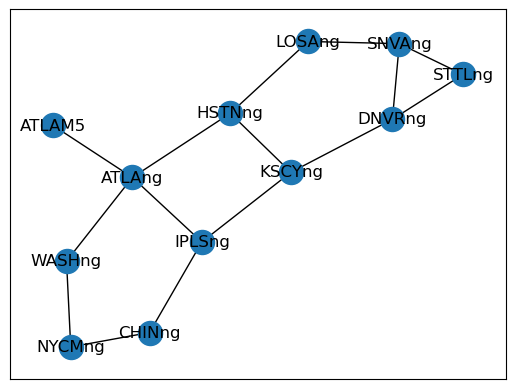

In [65]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G,seed=3113794652)
nx.draw_networkx(G,pos,with_labels=True)

In [66]:
import math

In [67]:
def harvesine(origin, destination):
        print(origin)
        print(destination)
        lat1, lon1 = origin
        lat2, lon2 = destination
        radius = 6371000
        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c

        return d

In [68]:
def add_latency_info(G):

    for i in G.edges:
            
            orig,dest = i
            
            dist = harvesine([G.nodes[orig]['Latitude'],G.nodes[orig]['Longitude']],[G.nodes[dest]['Latitude'],G.nodes[dest]['Longitude']])
            latency = dist/(2*10**8)
            latency = latency * 1000   # scale factor just to show better in the graph
            latency = round(latency,2)
            G.edges[i]['weight'] = latency

In [69]:
add_latency_info(G)

[33.75, -84.3833]
[34.5, -85.5]
[34.5, -85.5]
[29.770031, -95.517364]
[34.5, -85.5]
[39.780622, -86.159535]
[34.5, -85.5]
[38.897303, -77.026842]
[41.8333, -87.6167]
[39.780622, -86.159535]
[41.8333, -87.6167]
[40.7833, -73.9667]
[40.75, -105.0]
[38.961694, -96.596704]
[40.75, -105.0]
[37.38575, -122.02553]
[40.75, -105.0]
[47.6, -122.3]
[29.770031, -95.517364]
[38.961694, -96.596704]
[29.770031, -95.517364]
[34.05, -118.25]
[39.780622, -86.159535]
[38.961694, -96.596704]
[34.05, -118.25]
[37.38575, -122.02553]
[40.7833, -73.9667]
[38.897303, -77.026842]
[37.38575, -122.02553]
[47.6, -122.3]


In [70]:
npmatrix=[]
for i in G.nodes:
    eachrow=[]
    for j in G.nodes:
        eachrow.append(nx.dijkstra_path_length(G,i,j))
    npmatrix.append(eachrow)
print(npmatrix)

[[0, 0.66, 4.91, 11.840000000000002, 6.0600000000000005, 3.6100000000000003, 8.120000000000001, 17.020000000000003, 6.83, 19.410000000000004, 19.69, 5.16], [0.66, 0, 4.25, 11.18, 5.4, 2.95, 7.46, 16.36, 6.17, 18.75, 19.03, 4.5], [4.91, 4.25, 0, 9.53, 9.65, 1.3, 5.81, 19.62, 5.72, 17.1, 17.38, 7.39], [11.84, 11.18, 9.530000000000001, 0, 8.85, 8.23, 3.72, 10.09, 15.25, 7.57, 7.85, 15.68], [6.0600000000000005, 5.4, 9.650000000000002, 8.85, 0, 8.350000000000001, 5.13, 10.96, 11.57, 13.48, 16.7, 9.9], [3.6100000000000003, 2.95, 1.3, 8.23, 8.350000000000001, 0, 4.51, 18.32, 7.02, 15.8, 16.08, 7.45], [8.12, 7.46, 5.81, 3.72, 5.13, 4.51, 0, 13.81, 11.53, 11.290000000000001, 11.57, 11.96], [17.02, 16.36, 19.62, 10.09, 10.96, 18.32, 13.81, 0, 22.53, 2.52, 8.2, 20.86], [6.83, 6.17, 5.72, 15.25, 11.57, 7.02, 11.53, 22.53, 0, 22.82, 23.1, 1.67], [19.41, 18.75, 17.1, 7.57, 13.48, 15.8, 11.290000000000001, 2.52, 22.82, 0, 5.68, 23.25], [19.689999999999998, 19.029999999999998, 17.38, 7.85, 16.7, 16.08

In [122]:
import numpy as np
import random
latency_matrix = np.array([[0, 0.66, 4.91, 11.84, 6.06, 3.61, 8.12, 17.02, 6.83, 19.41, 19.69, 5.16],
                           [0.66, 0, 4.25, 11.18, 5.4, 2.95, 7.46, 16.36, 6.17, 18.75, 19.03, 4.5],
                           [4.91, 4.25, 0, 9.53, 9.65, 1.3, 5.81, 19.62, 5.72, 17.1, 17.38, 7.39],
                           [11.84, 11.18, 9.53, 0, 8.85, 8.23, 3.72, 10.09, 15.25, 7.57, 7.85, 15.68],
                           [6.06, 5.4, 9.65, 8.85, 0, 8.35, 5.13, 10.96, 11.57, 13.48, 16.7, 9.9],
                           [3.61, 2.95, 1.3, 8.23, 8.35, 0, 4.51, 18.32, 7.02, 15.8, 16.08, 7.45],
                           [8.12, 7.46, 5.81, 3.72, 5.13, 4.51, 0, 13.81, 11.53, 11.29, 11.57, 11.96],
                           [17.02, 16.36, 19.62, 10.09, 10.96, 18.32, 13.81, 0, 22.53, 2.52, 8.2, 20.86],
                           [6.83, 6.17, 5.72, 15.25, 11.57, 7.02, 11.53, 22.53, 0, 22.82, 23.1, 1.67],
                           [19.41, 18.75, 17.1, 7.57, 13.48, 15.8, 11.29, 2.52, 22.82, 0, 5.68, 23.25],
                           [19.69, 19.03, 17.38, 7.85, 16.7, 16.08, 11.57, 8.2, 23.1, 5.68, 0, 23.53],
                           [5.16, 4.5, 7.39, 15.68, 9.9, 7.45, 11.96, 20.86, 1.67, 23.25, 23.53, 0]])

num_nodes = 12
bandwidth = np.array([random.uniform(5, 10) for _ in range(12)])
cost=[133, 1081, 591, 901, 260, 1147, 745, 1516, 1573, 1028, 2196, 903, 505, 336, 1138]
demand=[1140,56067,9094,37150,14471,1147,4165,22050,6470,2026,16437,4841,22906,47980,6139]
print(bandwidth)

[6.09574158 8.26074892 5.07246823 9.17646032 5.95599191 5.16718326
 7.90556502 7.05864578 7.05755931 8.9517527  8.70490909 6.82901716]


In [159]:
import numpy as np
import random

def fitness_function(controllers, latency_matrix, cost, bandwidth, demand):
    
    delay = np.mean([latency_matrix[controller] for controller in controllers])
    total_cost = sum(cost[controller] for controller in controllers)
    total_bandwidth = sum(bandwidth[controller] for controller in controllers)
    total_demand = sum(demand[controller] for controller in controllers)
    fitness = 1 / delay + total_bandwidth + 1 / total_cost + total_demand
    
    return fitness

In [160]:
import numpy as np
import random

def initialize_population(pop_size, num_nodes, num_controllers):
    population = []
    for _ in range(pop_size):
        individual = random.sample(range(num_nodes), num_controllers)
        population.append(individual)
    return population

def select_best(population, latency_matrix, bandwidth, cost, demand):
    best_individual = None
    best_fitness = float('-inf')
    for individual in population:
        fitness = fitness_function(individual, latency_matrix, cost, bandwidth, demand)
        if fitness > best_fitness:
            best_fitness = fitness
            best_individual = individual
    return best_individual

def krill_herd_optimization(latency_matrix, bandwidth, cost, demand, pop_size=10, iterations=100):
    num_nodes = len(latency_matrix)
    num_controllers = 2
    population = initialize_population(pop_size, num_nodes, num_controllers)
    
    for _ in range(iterations):
        best_individual = select_best(population, latency_matrix, bandwidth, cost, demand)
        
        for i in range(pop_size):
            if random.random() < 0.1:  
                new_individual = random.sample(range(num_nodes), num_controllers)
                
                if fitness_function(new_individual, latency_matrix, cost, bandwidth, demand) > fitness_function(population[i], latency_matrix, cost, bandwidth, demand):
                    population[i] = new_individual
    
    return select_best(population, latency_matrix, bandwidth, cost, demand)



best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, demand)
print(f"Best controllers: {best_controllers}")


Best controllers: [1, 3]


In [140]:

def cluster_switches(population, latency_matrix, bandwidth, cost, demand):
    num_switches = len(latency_matrix)
    clusters = {'Controller A': [], 'Controller B': []}
    
    fitness_scores = [fitness_function(individual, latency_matrix, cost, bandwidth, demand) for individual in population]
    
    best_index = np.argmin(fitness_scores)  
    best_individual = population[best_index]
    
    for switch in range(num_switches):
        if switch not in best_individual:
            latency_to_a = latency_matrix[switch, best_individual[0]] * demand[switch]
            latency_to_b = latency_matrix[switch, best_individual[1]] * demand[switch]
            
            if latency_to_a < latency_to_b:
                clusters['Controller A'].append(switch)
            else:
                clusters['Controller B'].append(switch)
    
    return clusters

pop_size = 10
iterations = 100

population = [krill_herd_optimization(latency_matrix, bandwidth, cost, demand, pop_size, iterations) for _ in range(pop_size)]
clusters = cluster_switches(population, latency_matrix, bandwidth, cost, demand)

print("Cluster under Controller A:", clusters['Controller A'])
print("Cluster under Controller B:", clusters['Controller B'])

Cluster under Controller A: [6, 7, 9, 10]
Cluster under Controller B: [0, 2, 4, 5, 8, 11]


In [156]:
import numpy as np

def calculate_throughput(latency_matrix, controllers, bandwidth):
    num_nodes = len(latency_matrix)
    throughput = np.zeros(len(controllers))

    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        latency = latency_matrix[i, controllers[nearest_controller]]
        
        # Check if latency is not zero
        if latency != 0:
            throughput[nearest_controller] += bandwidth[i] / latency
        else:
            # If latency is zero, set throughput to a default value (e.g. bandwidth)
            throughput[nearest_controller] += bandwidth[i]
    
    return throughput

throughput = calculate_throughput(latency_matrix, best_controllers, bandwidth)
for i, controller in enumerate(best_controllers):
    print(f"Throughput for Controller {controller}: {throughput[i]}")

Throughput for Controller 3: 14.292616368033471
Throughput for Controller 1: 24.20620211633705


In [151]:
def calculate_packet_loss(latency_matrix, controllers, bandwidth, max_bandwidth_per_controller):
    num_nodes = len(latency_matrix)
    packet_loss = np.zeros(num_nodes)
    total_bandwidth_processed = np.zeros(len(controllers))
    congestion_factors = np.zeros(len(controllers))

    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        used_bandwidth = bandwidth[i]
        available_bandwidth = max_bandwidth_per_controller[controllers[nearest_controller]]
        
        if used_bandwidth > available_bandwidth:
            congestion_factor = used_bandwidth / available_bandwidth
        else:
            congestion_factor = 0
        
        total_bandwidth_processed[nearest_controller] += used_bandwidth
        congestion_factors[nearest_controller] = congestion_factor
    
    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        latency = latency_matrix[i, controllers[nearest_controller]]
        congestion_factor = congestion_factors[nearest_controller]
        
        packet_loss[i] = latency * congestion_factor
    
    packet_loss_percentage = (packet_loss / bandwidth) * 100
    
    return packet_loss, packet_loss_percentage

max_bandwidth_per_controller = np.random.randint(5, 10, size=num_nodes)
packet_loss, packet_loss_percentage = calculate_packet_loss(latency_matrix, best_controllers, bandwidth, max_bandwidth_per_controller)

for i in range(num_nodes):
    print(f"Packet loss for Node {i}: {packet_loss[i]}")
    print(f"Packet loss percentage for Node {i}: {packet_loss_percentage[i]:.2f}%")


Packet loss for Node 0: 0.7511918872281053
Packet loss percentage for Node 0: 12.32%
Packet loss for Node 1: 0.0
Packet loss percentage for Node 1: 0.00%
Packet loss for Node 2: 4.837220485938556
Packet loss percentage for Node 2: 95.36%
Packet loss for Node 3: 0.0
Packet loss percentage for Node 3: 0.00%
Packet loss for Node 4: 6.1461154409572245
Packet loss percentage for Node 4: 103.19%
Packet loss for Node 5: 3.3576001020044095
Packet loss percentage for Node 5: 64.98%
Packet loss for Node 6: 5.397043635764733
Packet loss percentage for Node 6: 68.27%
Packet loss for Node 7: 14.63875545292101
Packet loss percentage for Node 7: 207.39%
Packet loss for Node 8: 7.022505976056681
Packet loss percentage for Node 8: 99.50%
Packet loss for Node 9: 10.982693635144901
Packet loss percentage for Node 9: 122.69%
Packet loss for Node 10: 11.388922726008913
Packet loss percentage for Node 10: 130.83%
Packet loss for Node 11: 5.121762867464353
Packet loss percentage for Node 11: 75.00%


In [47]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, best_controllers, clusters, latency_matrix, y_off=0.05, x_off=0.05):

    pos = nx.spring_layout(G) 
    
    node_names = list(G.nodes)
    controller_colors = {'red': best_controllers[0], 'blue': best_controllers[1]}
    floral_colors = {'lightcoral': 'Controller A', 'lightblue': 'Controller B'}

    node_colors = ['lightgray'] * len(G.nodes)
    
    for idx, controller in enumerate(best_controllers):
        node_colors[controller] = list(controller_colors.keys())[idx % len(controller_colors)]

    for idx, (controller, switches) in enumerate(clusters.items()):
        floral_color = list(floral_colors.keys())[idx % len(floral_colors)]
        for switch in switches:
            node_colors[switch] = floral_color
    
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}

    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')

    latency_list = latency_matrix.tolist()
    node_to_index = {node: i for i, node in enumerate(G.nodes())}

    edge_labels = {}
    for u, v in G.edges():
        edge_labels[(u, v)] = latency_list[node_to_index[u]][node_to_index[v]]

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)

    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()

# Example usage
G = nx.read_gml("Albiene.gml")
clusters = cluster_switches(latency_matrix, best_controllers, demand)
plot_network(G, best_controllers, clusters, latency_matrix)


TypeError: cluster_switches() missing 2 required positional arguments: 'cost' and 'demand'

In [8]:
import numpy as np
import random
latency_matrix = np.array([[0, 0.66, 4.91, 11.84, 6.06, 3.61, 8.12, 17.02, 6.83, 19.41, 19.69, 5.16],
                           [0.66, 0, 4.25, 11.18, 5.4, 2.95, 7.46, 16.36, 6.17, 18.75, 19.03, 4.5],
                           [4.91, 4.25, 0, 9.53, 9.65, 1.3, 5.81, 19.62, 5.72, 17.1, 17.38, 7.39],
                           [11.84, 11.18, 9.53, 0, 8.85, 8.23, 3.72, 10.09, 15.25, 7.57, 7.85, 15.68],
                           [6.06, 5.4, 9.65, 8.85, 0, 8.35, 5.13, 10.96, 11.57, 13.48, 16.7, 9.9],
                           [3.61, 2.95, 1.3, 8.23, 8.35, 0, 4.51, 18.32, 7.02, 15.8, 16.08, 7.45],
                           [8.12, 7.46, 5.81, 3.72, 5.13, 4.51, 0, 13.81, 11.53, 11.29, 11.57, 11.96],
                           [17.02, 16.36, 19.62, 10.09, 10.96, 18.32, 13.81, 0, 22.53, 2.52, 8.2, 20.86],
                           [6.83, 6.17, 5.72, 15.25, 11.57, 7.02, 11.53, 22.53, 0, 22.82, 23.1, 1.67],
                           [19.41, 18.75, 17.1, 7.57, 13.48, 15.8, 11.29, 2.52, 22.82, 0, 5.68, 23.25],
                           [19.69, 19.03, 17.38, 7.85, 16.7, 16.08, 11.57, 8.2, 23.1, 5.68, 0, 23.53],
                           [5.16, 4.5, 7.39, 15.68, 9.9, 7.45, 11.96, 20.86, 1.67, 23.25, 23.53, 0]])

num_nodes = 12
bandwidth = np.array([random.uniform(5, 10) for _ in range(12)])
cost=[133, 1081, 591, 901, 260, 1147, 745, 1516, 1573, 1028, 2196, 903, 505, 336, 1138]
demand=[1140,56067,9094,37150,14471,1147,4165,22050,6470,2026,16437,4841,22906,47980,6139]
print(bandwidth)
print(len(latency_matrix))
print(len(bandwidth))
print(len(cost))
print(len(demand))





[9.75583984 6.53987512 8.90496927 5.25736826 8.82209622 9.6233171
 5.42411416 7.31388857 9.03984799 9.60693638 8.38057913 8.5372209 ]
12
12
15
15


In [42]:
import numpy as np
import random

def initialize_population(pop_size, num_nodes, num_controllers):
    population = []
    for _ in range(pop_size):
        individual = random.sample(range(num_nodes), num_controllers)
        population.append(individual)
    return population

def fitness_function(individual, latency_matrix, cost, bandwidth, demand):
    total_fitness = 0
    for controller in individual:
        delay = latency_matrix[controller].mean()  
        total_cost = cost[controller]
        total_bandwidth = bandwidth[controller]
        total_demand = demand[controller]
        
        if delay == 0:
            delay_fitness = 0
        else:
            delay_fitness = 1 / delay
        
        if total_cost == 0:
            cost_fitness = 0
        else:
            cost_fitness = 1 / total_cost
        
        fitness = delay_fitness + total_bandwidth + cost_fitness + total_demand
        total_fitness += fitness
    return total_fitness

def select_best(population, latency_matrix, bandwidth, cost, demand):
    best_individual = None
    best_fitness = float('-inf')
    for individual in population:
        total_fitness = fitness_function(individual, latency_matrix, cost, bandwidth, demand)
        if total_fitness > best_fitness:
            best_fitness = total_fitness
            best_individual = individual
    return best_individual

def krill_herd_optimization(latency_matrix, bandwidth, cost, demand, pop_size=10, iterations=100):
    num_nodes = len(latency_matrix)
    num_controllers = 2
    population = initialize_population(pop_size, num_nodes, num_controllers)
    
    for _ in range(iterations):
        best_individual = select_best(population, latency_matrix, bandwidth, cost, demand)
        
        for i in range(pop_size):
            if random.random() < 0.1:  
                new_individual = random.sample(range(num_nodes), num_controllers)
                
                if select_best([new_individual], latency_matrix, bandwidth, cost, demand) > select_best([population[i]], latency_matrix, bandwidth, cost, demand):
                    population[i] = new_individual
    
    return select_best(population, latency_matrix, bandwidth, cost, demand)


best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, demand)
print(f"Best controllers: {best_controllers}")


Best controllers: [10, 4]


In [61]:

def cluster_switches(population, latency_matrix, bandwidth, cost, demand):
    num_switches = len(latency_matrix)
    clusters = {'Controller A': [], 'Controller B': []}
    
    fitness_scores = [fitness_function(individual, latency_matrix, cost, bandwidth, demand) for individual in population]
    
    best_index = np.argmin(fitness_scores)  
    best_individual = population[best_index]
    
    for switch in range(num_switches):
        if switch not in best_individual:
            latency_to_a = latency_matrix[switch, best_individual[0]] * demand[switch]
            latency_to_b = latency_matrix[switch, best_individual[1]] * demand[switch]
            
            if latency_to_a < latency_to_b:
                clusters['Controller A'].append(switch)
            else:
                clusters['Controller B'].append(switch)
    
    return clusters

pop_size = 10
iterations = 100

population = [krill_herd_optimization(latency_matrix, bandwidth, cost, demand, pop_size, iterations) for _ in range(pop_size)]
clusters = cluster_switches(population, latency_matrix, bandwidth, cost, demand)

print("Cluster under Controller A:", clusters['Controller A'])
print("Cluster under Controller B:", clusters['Controller B'])

Cluster under Controller A: [0, 1, 2, 4, 5, 6, 8]
Cluster under Controller B: [3, 9, 10]


In [62]:
import numpy as np

# Assuming latency_matrix is a 2D list
latency_matrix = np.array(latency_matrix)

def cluster_switches(latency_matrix, best_controllers, demand):
    num_switches = len(latency_matrix)
    clusters = {f'Controller {i}': [] for i in best_controllers}
    
    for switch in range(num_switches):
        if switch not in best_controllers:
            min_latency = float('inf')
            assigned_controller = None
            for controller in best_controllers:
                latency = latency_matrix[switch, controller] * demand[switch]
                if latency < min_latency:
                    min_latency = latency
                    assigned_controller = controller
            clusters[f'Controller {assigned_controller}'].append(switch)
    
    return clusters

clusters = cluster_switches(latency_matrix, best_controllers, demand)

print("Clusters:")
for controller, switches in clusters.items():
    print(f"{controller}: {switches}")

Clusters:
Controller 10: [3, 7, 9]
Controller 4: [0, 1, 2, 5, 6, 8, 11]


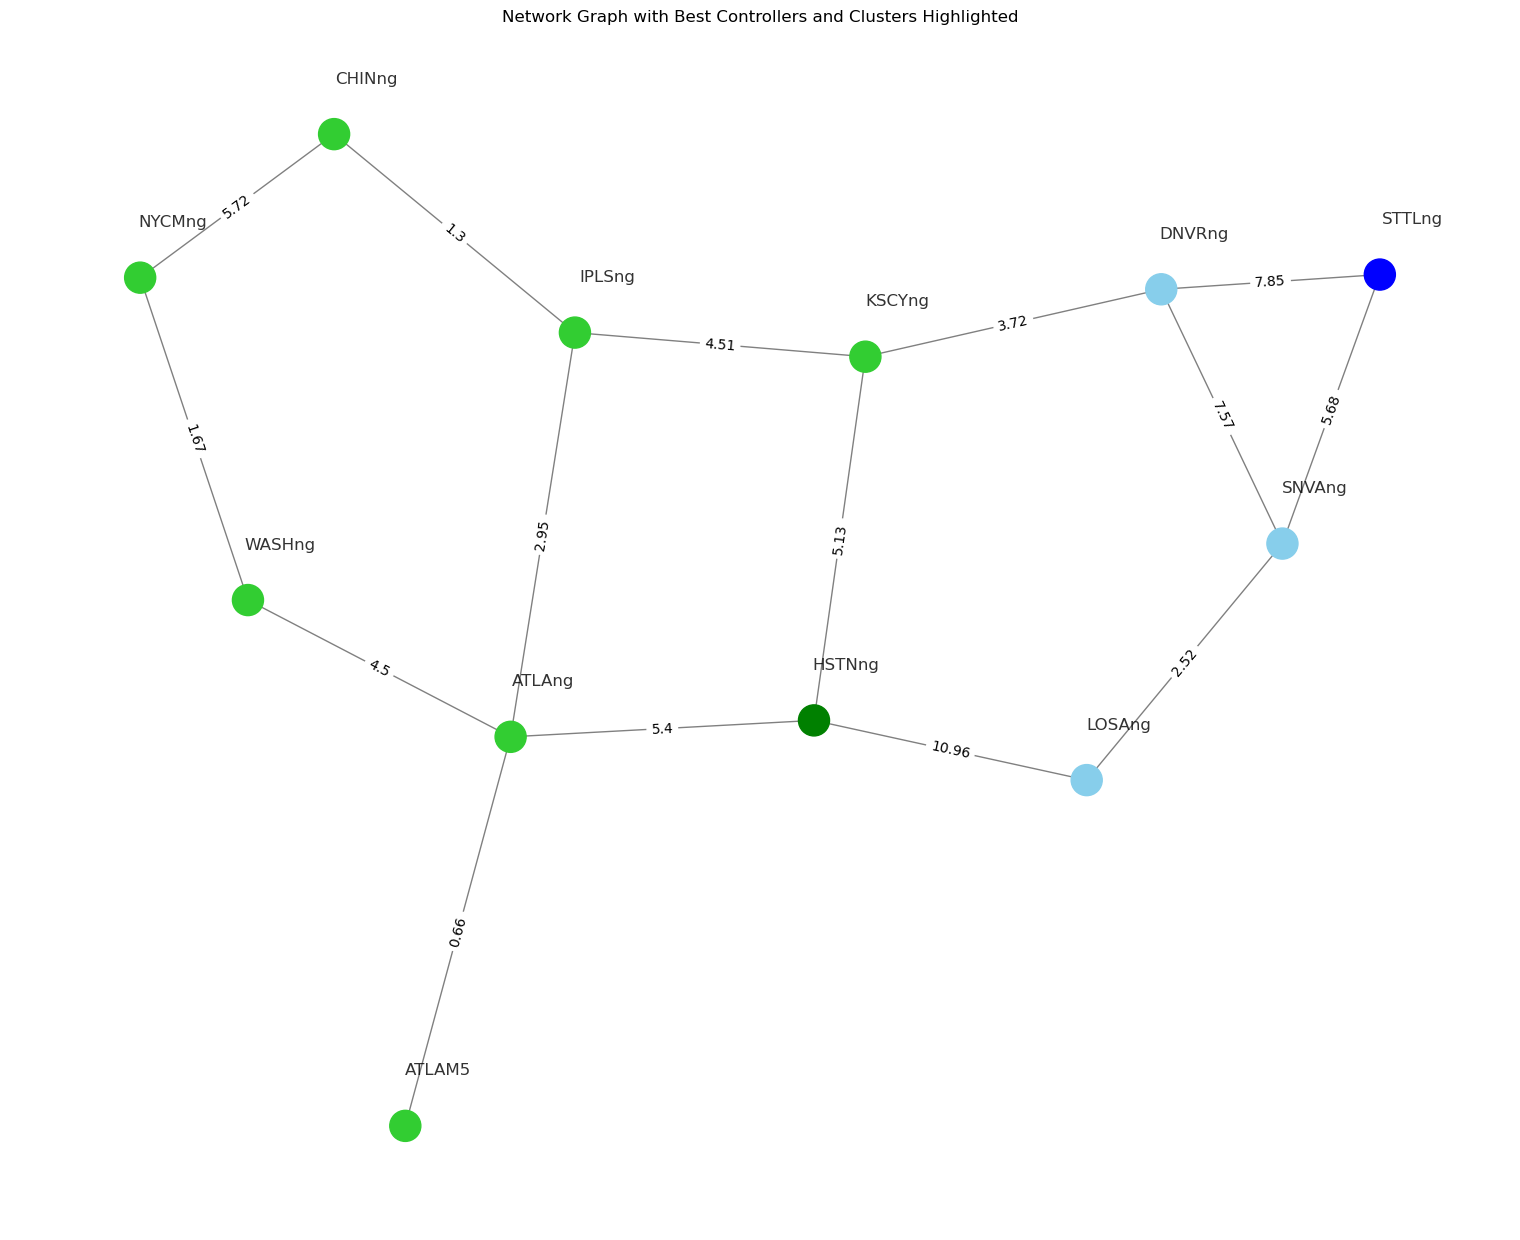

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, best_controllers, clusters, latency_matrix, y_off=0.05, x_off=0.05):
    pos = nx.spring_layout(G)
    node_colors = ['black' for _ in G.nodes()]
    
    controller_colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
    floral_colors = ['skyblue', 'limegreen', 'salmon', 'coral', 'lavender', 'turquoise', 'fuchsia', 'lemonchiffon', 'peachpuff', 'palevioletred']
    
    for idx, controller in enumerate(best_controllers):
        node_colors[controller] = controller_colors[idx % len(controller_colors)]

    for idx, (controller, switches) in enumerate(clusters.items()):
        floral_color = floral_colors[idx % len(floral_colors)]
        for switch in switches:
            node_colors[switch] = floral_color
    
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}

    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')

    latency_list = latency_matrix.tolist()
    node_to_index = {node: i for i, node in enumerate(G.nodes())}

    edge_labels = {}
    for u, v in G.edges():
        edge_labels[(u, v)] = latency_list[node_to_index[u]][node_to_index[v]]

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)

    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()

# Example usage
G = nx.read_gml("Albiene.gml")

clusters = cluster_switches(latency_matrix, best_controllers, demand)
plot_network(G, best_controllers, clusters, latency_matrix)


In [68]:
avg_latencies = {}
total_latency_all_clusters = 0
total_switches_all_clusters = 0

for i, (controller, switches) in enumerate(clusters.items()):
    controller_index = int(controller.split()[-1]) - 1  # Convert 'Controller X' to X-1
    total_latency = 0
    for switch in switches:
        total_latency += latency_matrix[switch, controller_index]
    avg_latency = total_latency / len(switches)
    avg_latencies[controller] = avg_latency
    total_latency_all_clusters += total_latency
    total_switches_all_clusters += len(switches)

for i, (controller, avg_latency) in enumerate(avg_latencies.items()):
    print(f"Average latency for cluster {i+1}: {avg_latency:.2f}")

overall_avg_latency = total_latency_all_clusters / total_switches_all_clusters
print(f"Overall average latency for all clusters: {overall_avg_latency:.2f}")


Average latency for cluster 1: 3.36
Average latency for cluster 2: 10.78
Overall average latency for all clusters: 8.55


In [69]:
worst_case_latencies = {}
for controller, switches in clusters.items():
    controller_index = int(controller.split()[-1]) - 1
    worst_latency = 0
    for switch in switches:
        latency = latency_matrix[switch, controller_index]
        if latency > worst_latency:
            worst_latency = latency
    worst_case_latencies[controller] = worst_latency

for i, (controller, worst_latency) in enumerate(worst_case_latencies.items()):
    print(f"Worst-case latency for cluster {i+1}: {worst_latency:.2f}")

average_worst_latency = sum(worst_case_latencies.values()) / len(worst_case_latencies)
print(f"Average worst-case latency across all clusters: {average_worst_latency:.2f}")


Worst-case latency for cluster 1: 7.57
Worst-case latency for cluster 2: 15.68
Average worst-case latency across all clusters: 11.62


In [70]:
avg_costs = {}
total_cost_all_clusters = 0
total_switches_all_clusters = 0

for controller, switches in clusters.items():
    total_cost = sum([cost[i] for i in switches])
    avg_cost = total_cost / len(switches)
    avg_costs[controller] = avg_cost
    total_cost_all_clusters += total_cost
    total_switches_all_clusters += len(switches)

for i, (controller, avg_cost) in enumerate(avg_costs.items()):
    print(f"Average cost for cluster {i+1}: {avg_cost:.2f}")

overall_avg_cost = total_cost_all_clusters / total_switches_all_clusters
print(f"Overall average cost for all clusters: {overall_avg_cost:.2f}")


Average cost for cluster 1: 1148.33
Average cost for cluster 2: 881.86
Overall average cost for all clusters: 961.80


In [71]:
import numpy as np

def calculate_throughput(latency_matrix, switches, controllers, bandwidth):
    num_nodes = len(latency_matrix)
    throughput = np.zeros((len(switches), len(controllers)))

    for i, switch in enumerate(switches):
        for j, controller in enumerate(controllers):
            latency = latency_matrix[switch, controller]
            
            # Check if latency is not zero
            if latency != 0:
                throughput[i, j] = bandwidth[switch] / latency
            else:
                # If latency is zero, set throughput to a default value (e.g. bandwidth)
                throughput[i, j] = bandwidth[switch]
    
    return throughput

throughput = calculate_throughput(latency_matrix, switches, best_controllers, bandwidth)

for i, switch in enumerate(switches):
    for j, controller in enumerate(best_controllers):
        print(f"Throughput for Switch {switch} to Controller {controller}: {throughput[i, j]}")

Throughput for Switch 0 to Controller 10: 0.4954718051836178
Throughput for Switch 0 to Controller 4: 1.6098745617269694
Throughput for Switch 1 to Controller 10: 0.343661330348131
Throughput for Switch 1 to Controller 4: 1.2110879845416542
Throughput for Switch 2 to Controller 10: 0.5123687728708051
Throughput for Switch 2 to Controller 4: 0.9227947432636883
Throughput for Switch 5 to Controller 10: 0.5984649937381139
Throughput for Switch 5 to Controller 4: 1.1524930657854935
Throughput for Switch 6 to Controller 10: 0.46880848360102995
Throughput for Switch 6 to Controller 4: 1.0573321940085607
Throughput for Switch 8 to Controller 10: 0.3913354108236344
Throughput for Switch 8 to Controller 4: 0.7813178902356054
Throughput for Switch 11 to Controller 10: 0.36282281750556405
Throughput for Switch 11 to Controller 4: 0.8623455450410024


In [72]:
average_throughput = np.mean(throughput, axis=0)
total_throughput = 0
num_clusters = len(best_controllers)

for j, controller in enumerate(best_controllers):
    total_throughput += average_throughput[j]
    print(f"Average throughput for Cluster {j+1}: {average_throughput[j]}")

overall_avg_throughput = total_throughput / num_clusters
print(f"Overall average throughput for all clusters: {overall_avg_throughput:.2f}")


Average throughput for Cluster 1: 0.45327623058155664
Average throughput for Cluster 2: 1.085320854943282
Overall average throughput for all clusters: 0.77


In [73]:
cluster_indices = {controller: int(controller.split()[-1]) - 1 for controller in clusters.keys()}

avg_latency_between_clusters = {}
for i, (controller1, index1) in enumerate(cluster_indices.items()):
    for j, (controller2, index2) in enumerate(cluster_indices.items()):
        if i < j:  # Avoid duplicating pairs and self-pairing
            avg_latency_between_clusters[(controller1, controller2)] = (latency_matrix[index1, index2] + latency_matrix[index2, index1]) / 2

for (controller1, controller2), avg_latency in avg_latency_between_clusters.items():
    cluster1 = int(controller1.split()[-1])
    cluster2 = int(controller2.split()[-1])
    print(f"Average latency between cluster {cluster1} and cluster {cluster2}: {avg_latency:.2f}")

Average latency between cluster 10 and cluster 4: 7.57


In [74]:
avg_demands = {}
total_demand_all_clusters = 0
total_switches_all_clusters = 0

for i, (controller, switches) in enumerate(clusters.items()):
    total_demand = 0
    for switch in switches:
        total_demand += demand[switch]
    avg_demand = total_demand / len(switches)
    avg_demands[controller] = avg_demand
    total_demand_all_clusters += total_demand
    total_switches_all_clusters += len(switches)

for i, (controller, avg_demand) in enumerate(avg_demands.items()):
    print(f"Average demand for cluster {i+1}: {avg_demand:.2f}")

overall_avg_demand = total_demand_all_clusters / total_switches_all_clusters
print(f"Overall average demand for all clusters: {overall_avg_demand:.2f}")


Average demand for cluster 1: 20408.67
Average demand for cluster 2: 11846.29
Overall average demand for all clusters: 14415.00


In [32]:
import numpy as np

def calculate_throughput(latency_matrix, controllers, bandwidth):
    num_nodes = len(latency_matrix)
    throughput = np.zeros(len(controllers))

    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        latency = latency_matrix[i, controllers[nearest_controller]]
        
        if latency != 0:
            throughput[nearest_controller] += bandwidth[i] / latency
        else:
            throughput[nearest_controller] += bandwidth[i]
    
    return throughput

throughput = calculate_throughput(latency_matrix, best_controllers, bandwidth)
for i, controller in enumerate(best_controllers):
    print(f"Throughput for Controller {controller}: {throughput[i]}")

Throughput for Controller 9: 13.98472718424499
Throughput for Controller 3: 12.362199724097188


In [ ]:
def calculate_packet_loss(latency_matrix, controllers, bandwidth, max_bandwidth_per_controller):
    num_nodes = len(latency_matrix)
    packet_loss = np.zeros(num_nodes)
    total_bandwidth_processed = np.zeros(len(controllers))
    congestion_factors = np.zeros(len(controllers))

    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        used_bandwidth = bandwidth[i]
        available_bandwidth = max_bandwidth_per_controller[controllers[nearest_controller]]
        
        if used_bandwidth > available_bandwidth:
            congestion_factor = used_bandwidth / available_bandwidth
        else:
            congestion_factor = 0
        
        total_bandwidth_processed[nearest_controller] += used_bandwidth
        congestion_factors[nearest_controller] = congestion_factor
    
    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        latency = latency_matrix[i, controllers[nearest_controller]]
        congestion_factor = congestion_factors[nearest_controller]
        
        packet_loss[i] = latency * congestion_factor
    
    packet_loss_percentage = (packet_loss / bandwidth) * 100
    
    return packet_loss, packet_loss_percentage

max_bandwidth_per_controller = np.random.randint(5, 10, size=num_nodes)
packet_loss, packet_loss_percentage = calculate_packet_loss(latency_matrix, best_controllers, bandwidth, max_bandwidth_per_controller)

for i in range(num_nodes):
    print(f"Packet loss for Node {i}: {packet_loss[i]}")
    print(f"Packet loss percentage for Node {i}: {packet_loss_percentage[i]:.2f}%")

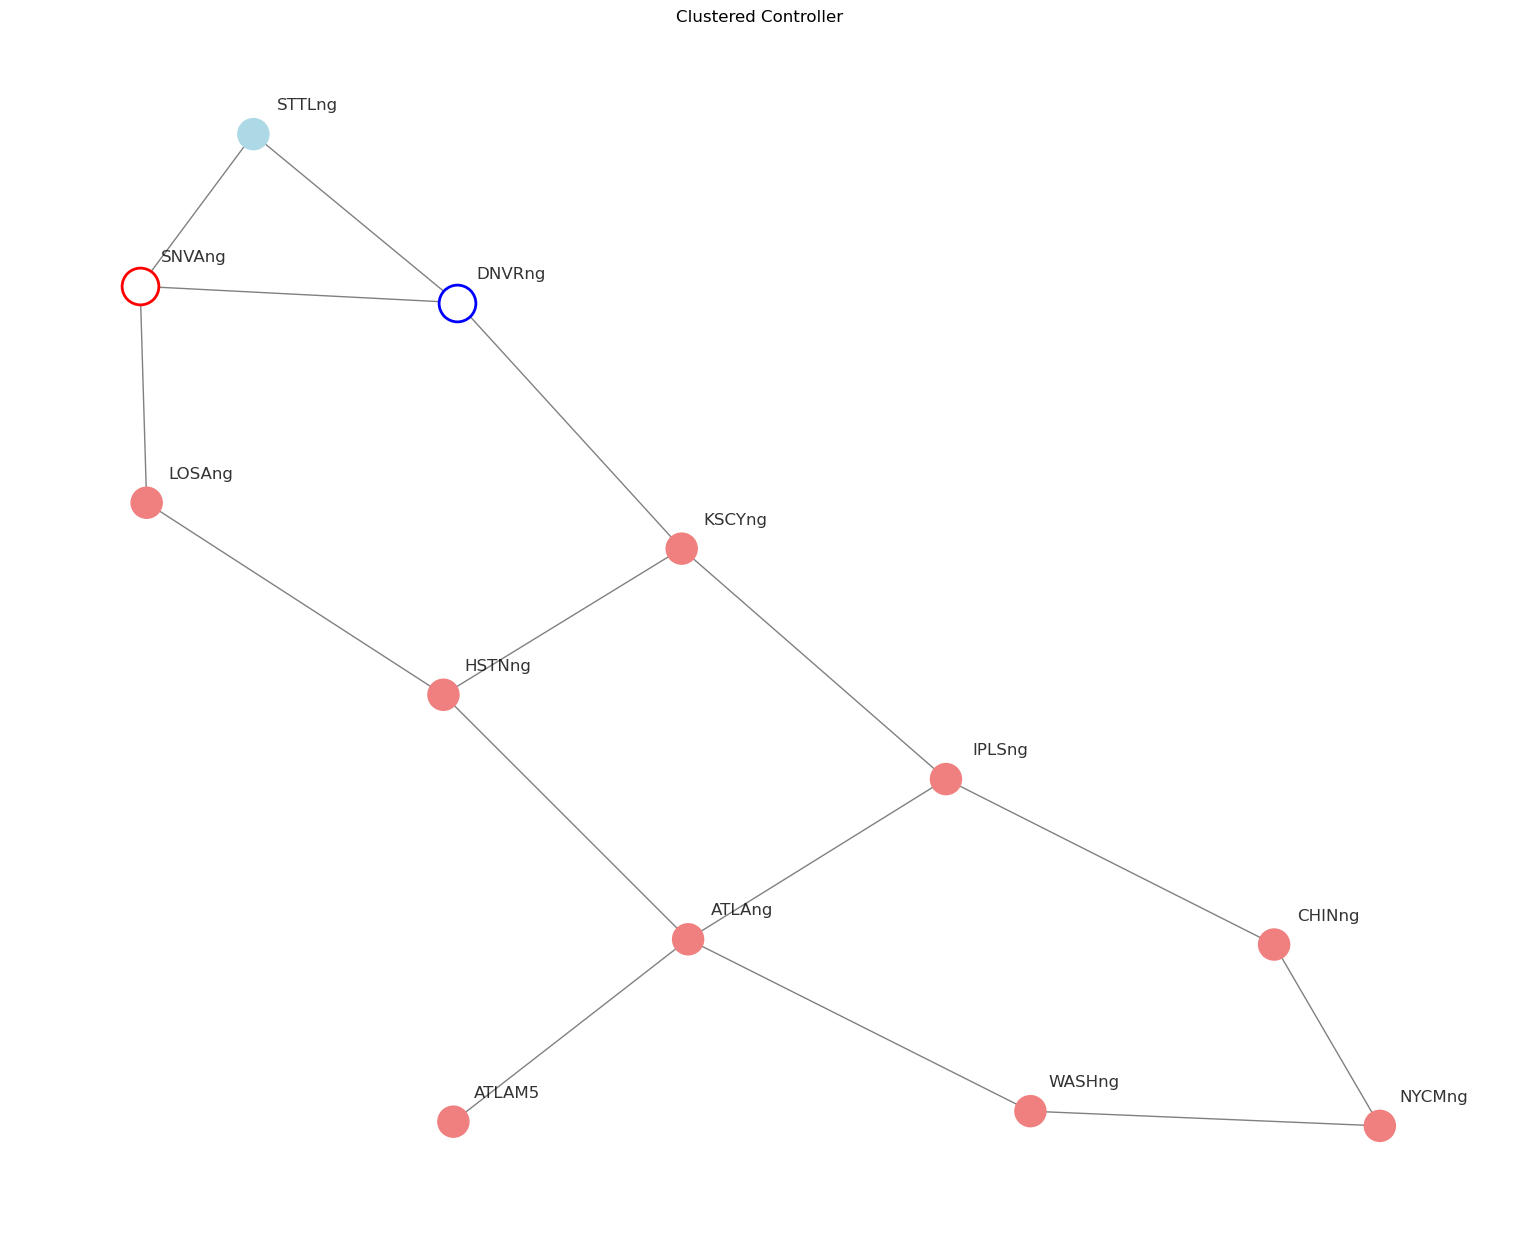

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, best_controllers, clusters, y_off=0.05, x_off=0.05):

    pos = nx.spring_layout(G) 
    
    node_names = list(G.nodes)
    controller_a_name = node_names[best_controllers[0]]
    controller_b_name = node_names[best_controllers[1]]
    
    node_colors = []
    for node in G.nodes():
        if node == controller_a_name:
            node_colors.append('red')  
        elif node == controller_b_name:
            node_colors.append('blue')  
        elif node_names.index(node) in clusters['Controller A']:
            node_colors.append('lightcoral')  
        elif node_names.index(node) in clusters['Controller B']:
            node_colors.append('lightblue')  
        else:
            node_colors.append('lightcoral')
    
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}
    
    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')
    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)
    
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_a_name], node_color='white', edgecolors='red', node_size=700, linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_b_name], node_color='white', edgecolors='blue', node_size=700, linewidths=2)
    
    plt.title("Clustered Controller")
    plt.show()

plot_network(G, best_controllers, clusters)